In [102]:
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 

In [103]:
income_df = pd.read_csv('data/income.csv')
income_df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


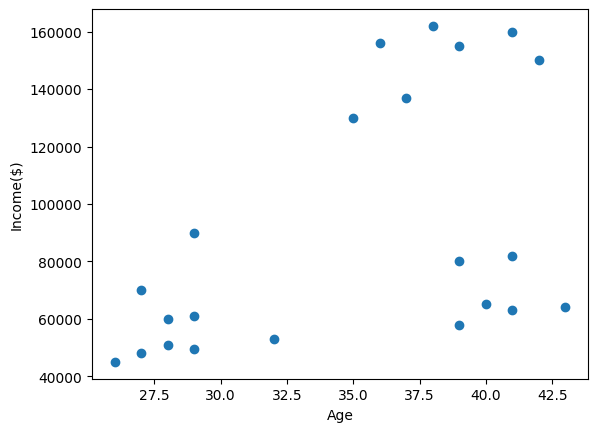

In [104]:
plt.scatter(income_df['Age'], income_df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

In [105]:
KMeans_model = KMeans(n_clusters=3)
y_predicted = KMeans_model.fit_predict(income_df[['Age', 'Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [106]:
income_df['cluster'] = y_predicted
income_df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [107]:
KMeans_model.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

In [108]:
df1 = income_df[income_df.cluster == 0]
df2 = income_df[income_df.cluster == 1]
df3 = income_df[income_df.cluster == 2]

Text(0, 0.5, 'Income($)')

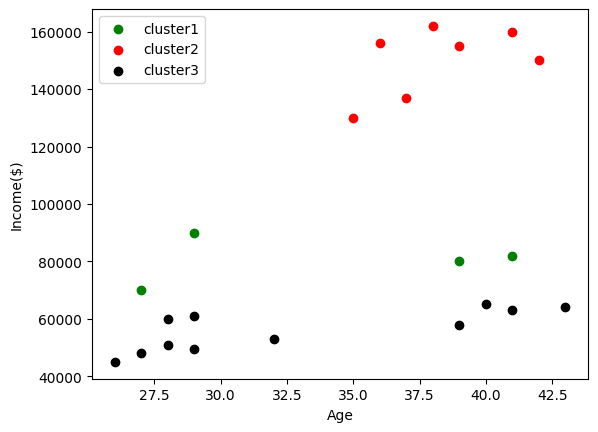

In [109]:
plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='black')
# plt.scatter(KMeans_model.cluster_centers_[:,0], KMeans_model.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
plt.legend(['cluster1', 'cluster2', 'cluster3'])
plt.xlabel('Age')
plt.ylabel('Income($)')


In [110]:
scaler = MinMaxScaler()
scaler.fit(income_df[['Income($)']])
income_df['Income($)'] = scaler.transform(income_df[['Income($)']])
scaler.fit(income_df[['Age']])
income_df['Age'] = scaler.transform(income_df[['Age']])
income_df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [111]:
y_predicted = KMeans_model.fit_predict(income_df[['Age', 'Income($)']])
income_df['cluster'] = y_predicted
income_df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


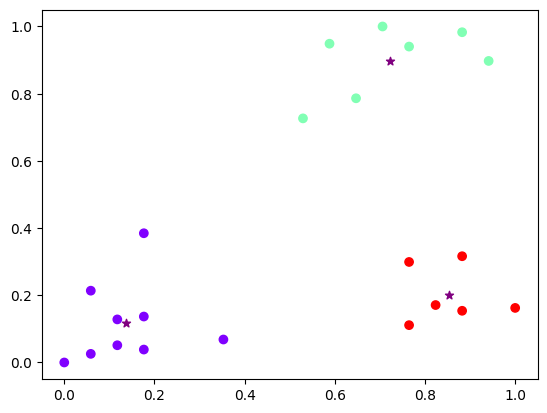

In [112]:
plt.scatter(income_df.Age, income_df['Income($)'], c=income_df['cluster'], cmap='rainbow')
plt.scatter(KMeans_model.cluster_centers_[:,0], KMeans_model.cluster_centers_[:,1], color='purple', marker='*', label='centroid')


## Finding the value of K

[5.434011511988179, 2.091136388699078, 0.4750783498553096, 0.4504076770759213, 0.3071350418475292, 0.23472396003560053, 0.16869711728567788, 0.18098719680212005, 0.12104007625145943]


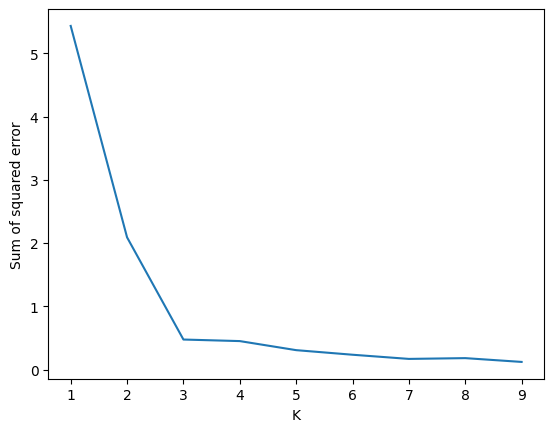

In [117]:
sse=[]
k_rng = range(1,10)
for k in k_rng:
	km = KMeans(n_clusters=k)
	km.fit(income_df[['Age', 'Income($)']])
	sse.append(km.inertia_)
print(sse)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)
plt.show()
